# Ecualización de histogramas

El proceso es el siguiente:
1. El programa toma como entrada una imagen.
2. Si es a color hay que pasarla a escala de grises.
3. Obtener el histograma
4. Realizar la ecualización
5. Al final se muestra la imagen original y la imagen ecualizada

Todo el proceso se hace con la librería **OpenCV**.

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [3]:
plt.rcParams['figure.figsize'] = (9,9)

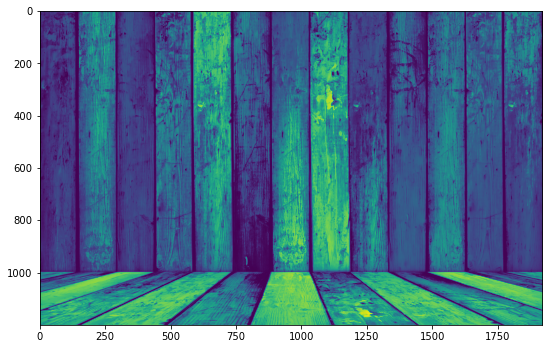

In [4]:
### Paso 1: Cargar la imagen desde disco

img = cv.imread(r'C:\Users\theki\Pictures/Colorful-wooden-abstract_1920x1200.jpg',0)

### Desplegamos la imagen original
### Recordar que matplotlib 'lee' la imagen en formato BGR no RGB

plt.imshow(img)
plt.show()

Siempre me pasa en el jupyter notebook que las imágenes a blanco y negro se despliegan como imaágenes "verdosas".
Whatever

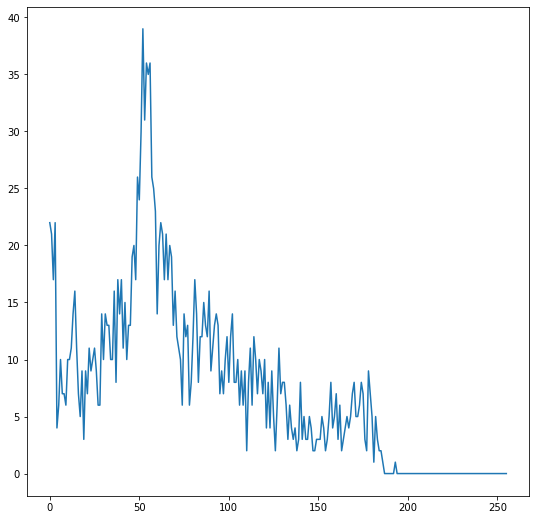

In [5]:
### Paso 3: Obtener el histograma

hist = cv.calcHist(img, # la imagen
                   [0], # como es grayscale pasamos el canal 0
                  None, # por si queremos calcular un área específica
                  [256], # cuantos bines queremoos
                  [0,256]) # el rango del histograma, este es el valor default

# Mostramos el histograma
plt.plot(hist)
plt.show()

Como podemos observar, tenemos los valores muy agrupados entre el bin 0 y 100; a partir del bin ~160 ya no hay valores.

Esto se debe a que hay píxeles con una intensidad baja (valor de 0 y 125) u oscuros, mientras que hay pocos píxeles claros o con intensidad baja.

Veamos si esto se "corrige" con la equalización.

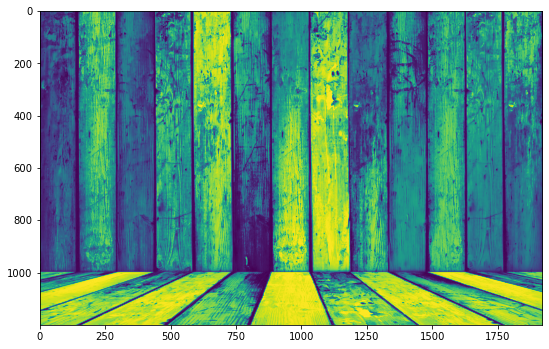

In [6]:
### Paso 4: Equalizar el histograma
equalized = cv.equalizeHist(img)

# Ver el histograma resultante
plt.imshow(equalized)
plt.show()

El método de OpenCV convierte la imagen completa en un arreglo de numpy, así que entre más grande la imagen, serán mayores las dimensiones del arreglo.

Con *matplotlib* podemos graficar el histograma y con la función **equalize_hist** de **skimage.exposure** se logra un mejor resultado, al menos así lo veo.

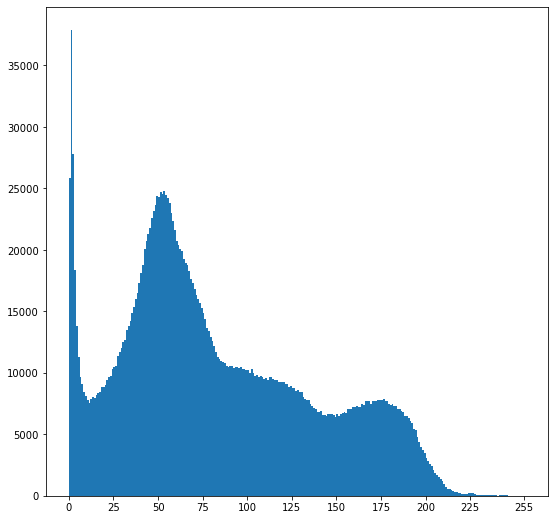

In [30]:
plt.hist(img.flatten(),256, range=(0,256))
plt.xticks([0,25,50,75,100,125,150,175,200,225,255])
plt.show()

In [18]:
from skimage.exposure import equalize_hist

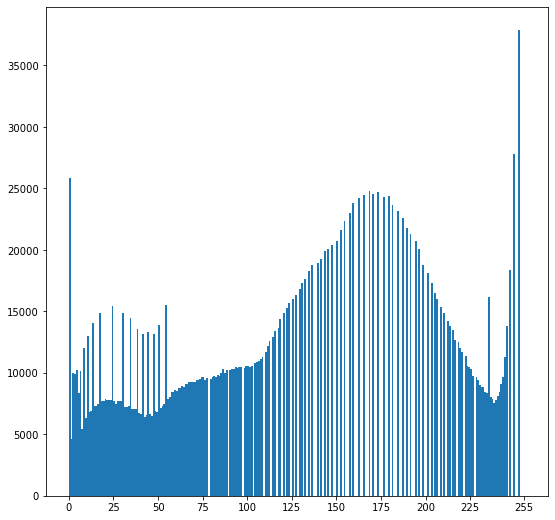

In [31]:
eq2_dummy = np.asarray(equalized*255, dtype='uint8')


plt.hist(eq2_dummy.flatten(),256, range=(0,256))
plt.xticks([0,25,50,75,100,125,150,175,200,225,255])
plt.show()

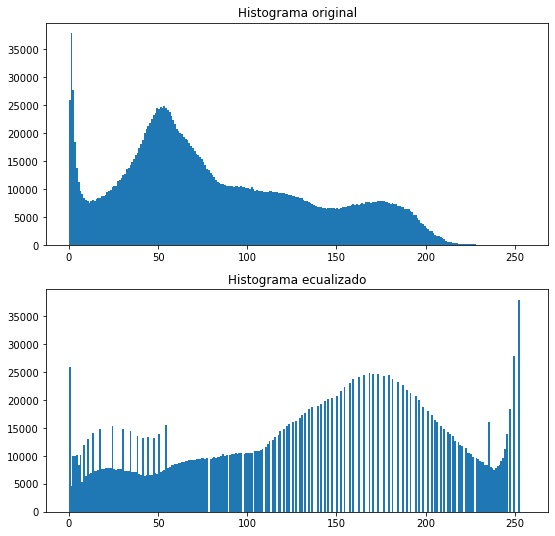

In [34]:
fig, (ax1,ax2) = plt.subplots(2,1) # Para gráficas en dos renglones, una columna
#     plt.suptitle('Histogramas')
ax1.hist(img.flatten(),256, range=(0,256))
#     ax1.plot(,'g')
ax1.set_title('Histograma original')
ax2.hist(eq2_dummy.flatten(),256, range=(0,256))
ax2.set_title('Histograma ecualizado')

plt.show()

Como pueden observar, el histograma ecualizado tiene intensidades mas 'balanceadas', a comparación del original donde los valores de intensidad se agrupan cerca del bin 50.